In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
!pip install opendatasets -q

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/fatmamtalaat/autistic-children-emotions-dr-fatma-m-talaat") #باستخدام المكتبة راح نحمل الداتا سيت

100%|██████████| 23.6M/23.6M [00:02<00:00, 11.6MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras import (layers, models, preprocessing, utils, losses, optimizers)
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# read data with `custom method`

In [ ]:
images = []
labels = []

def read_images(url, label):
  path = glob.glob(url+"/*.jpg")
  for i in path:
      image = tf.keras.preprocessing.image.load_img(i,color_mode='grayscale', target_size=(250,250)) # Open image تخلي الصور نفس الحجم
      image = np.array(image)
      images.append(image)
      labels.append(label)

natural = read_images("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Train/Natural", 0)
anger = read_images("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Train/anger", 1)
fear = read_images("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Train/fear", 2)
joy = read_images("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Train/joy", 3)
sadness = read_images("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Train/sadness", 4)
surprise = read_images("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Train/surprise", 5)
natural_test = read_images("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/Natural", 0)
anger_test = read_images("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/anger", 1)
fear_test = read_images("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/fear", 2)
joy_test = read_images("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/joy", 3)
sadness_test = read_images("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/sadness", 4)
surprise_test = read_images("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/surprise", 5)

In [ ]:
images = np.asarray(images)
labels = np.asarray(labels)

In [ ]:
import warnings as warn
warn.simplefilter('ignore')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

# Machine Learning Models

In [ ]:
import pandas as pd

dataset = np.reshape(images,(images.shape[0],-1))
dataset = np.hstack((dataset, labels.reshape(len(labels),1)))
data = pd.DataFrame(dataset)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,62500
0,49,50,50,50,50,51,51,57,57,56,...,178,177,180,184,188,192,194,194,193,0
1,199,201,202,203,204,205,207,211,212,214,...,106,128,141,151,156,131,109,105,113,0
2,253,253,250,252,253,252,252,253,254,254,...,244,244,244,244,244,243,243,242,242,0
3,210,210,210,211,211,211,211,211,211,211,...,43,64,80,85,78,84,97,109,114,0
4,137,161,167,176,162,164,139,129,110,75,...,137,137,140,139,138,137,138,139,140,0


In [ ]:
data.iloc[:,-1].value_counts()

3    387
4    213
1     70
5     69
0     55
2     32
Name: 62500, dtype: int64

# Resampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

features = data.iloc[:, :-1]
target = data.iloc[:, -1].astype(int)

sampler = RandomOverSampler(random_state=42)
features, target = sampler.fit_resample(features, target)

In [ ]:
from collections import Counter

Counter(target)

Counter({0: 387, 1: 387, 2: 387, 3: 387, 4: 387, 5: 387})

In [ ]:
features.shape

(2322, 62500)

# Split The Dataset

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=target,
                                                    shuffle=True)

In [ ]:
X_train.shape

(1857, 62500)

# `Scale The Data` and  `dimentionality reduction`

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=300))
])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [ ]:
X_train.shape

(1857, 300)

# Logistic Regression

In [ ]:
plt.rcParams['figure.figsize']= (10,5)

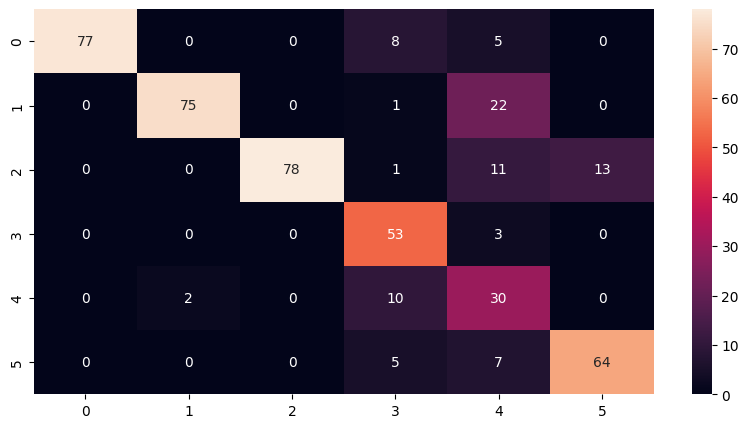

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

lr = LogisticRegression(max_iter=1000, solver='liblinear')

lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
conf_matrix = metrics.confusion_matrix(predictions, y_test)

sns.heatmap(conf_matrix, annot=True)
plt.show()

In [ ]:
precison = metrics.precision_score(predictions, y_test, average='weighted')
f1_score = metrics.f1_score(predictions, y_test, average='weighted')


print('the precison score is:', round(precison,2))
print('the F1 score is:', round(f1_score,2))

the precison score is: 0.87
the F1 score is: 0.83


# Support Vector Machines

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="poly", C=2, probability=True)
svc.fit(X_train, y_train)

SVC(C=2, kernel='poly', probability=True)

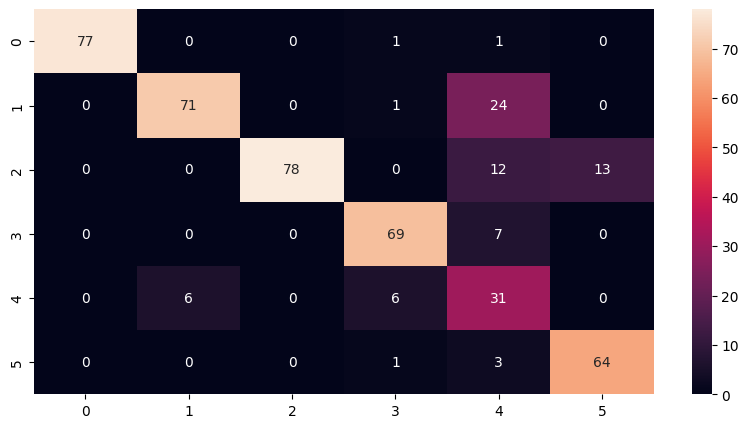

In [ ]:
predictions = svc.predict(X_test)
conf_matrix = metrics.confusion_matrix(predictions, y_test)

sns.heatmap(conf_matrix, annot=True)
plt.show()

In [ ]:
precison = metrics.precision_score(predictions, y_test, average='weighted')
f1_score = metrics.f1_score(predictions, y_test, average='weighted')


print('the precison score is:', round(precison,2))
print('the F1 score is:', round(f1_score,2))

the precison score is: 0.88
the F1 score is: 0.85


In [ ]:
print(metrics.classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        79
           1       0.92      0.74      0.82        96
           2       1.00      0.76      0.86       103
           3       0.88      0.91      0.90        76
           4       0.40      0.72      0.51        43
           5       0.83      0.94      0.88        68

    accuracy                           0.84       465
   macro avg       0.84      0.84      0.83       465
weighted avg       0.88      0.84      0.85       465



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=300,
                            criterion ='entropy',
                            max_depth=10,
                            random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300,
                       random_state=42)

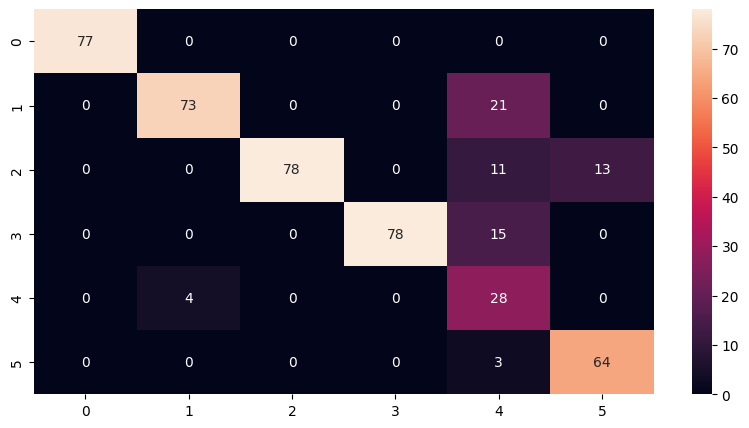

In [ ]:
predictions = rf.predict(X_test)
conf_matrix = metrics.confusion_matrix(predictions, y_test)

sns.heatmap(conf_matrix, annot=True)
plt.show()

In [ ]:
precison = metrics.precision_score(predictions, y_test, average='weighted')
recall = metrics.recall_score(predictions, y_test, average='weighted')
f1_score = metrics.f1_score(predictions, y_test, average='weighted')


print('the precison score is:', round(precison,2))
print('the F1 score is:', round(f1_score,2))

print(metrics.classification_report(predictions, y_test))

the precison score is: 0.92
the F1 score is: 0.87
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       0.95      0.78      0.85        94
           2       1.00      0.76      0.87       102
           3       1.00      0.84      0.91        93
           4       0.36      0.88      0.51        32
           5       0.83      0.96      0.89        67

    accuracy                           0.86       465
   macro avg       0.86      0.87      0.84       465
weighted avg       0.92      0.86      0.87       465



# `Stacking Classifiers`

In [ ]:
from sklearn.ensemble import StackingClassifier

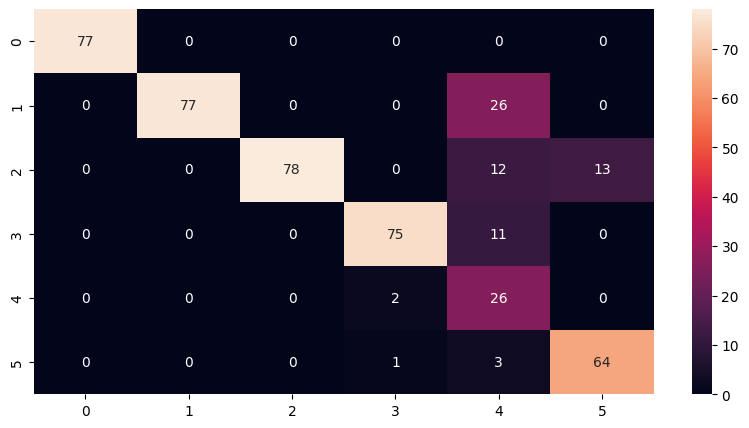

the precison score is: 0.93
the F1 score is: 0.87


In [ ]:
estimators= [
    ('lr', lr),
    ('svc',svc),
]

stacking_clf = StackingClassifier(estimators=estimators,
                              final_estimator=rf)

stacking_clf.fit(X_train, y_train)

predictions = stacking_clf.predict(X_test)
conf_matrix = metrics.confusion_matrix(predictions, y_test)

sns.heatmap(conf_matrix, annot=True)
plt.show()

precison = metrics.precision_score(predictions, y_test, average='weighted')
recall = metrics.recall_score(predictions, y_test, average='weighted')
f1_score = metrics.f1_score(predictions, y_test, average='weighted')


print('the precison score is:', round(precison,2))
print('the F1 score is:', round(f1_score,2))

In [ ]:
print(metrics.classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      0.75      0.86       103
           2       1.00      0.76      0.86       103
           3       0.96      0.87      0.91        86
           4       0.33      0.93      0.49        28
           5       0.83      0.94      0.88        68

    accuracy                           0.85       465
   macro avg       0.85      0.87      0.83       465
weighted avg       0.93      0.85      0.87       465



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

In [ ]:
with open('final_model.pkl', 'wb') as file:
  pickle.dump(stacking_clf, file=file)

In [ ]:
model = pickle.load(open('/content/final_model.pkl', 'rb'))

In [ ]:
def predict_class(image):
  image = tf.keras.utils.load_img(image, color_mode="grayscale", target_size=(250, 250))
  image = np.array(image)
  image = image.reshape(1, image.shape[0]*image.shape[1])
  image = pipe.transform(image)
  class_ = model.predict(image)
  if class_ == 0:
    return "Natural"
  elif class_ == 1:
    return "Anger"
  elif class_ == 2:
    return "Fear"
  elif class_ == 3:
    return "Joy"
  elif class_ == 4:
    return "Sadness"
  else:
    return "Surprise"

In [ ]:
predict_class("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Train/joy/0018.jpg")

'Joy'

In [ ]:
predict_class("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/anger/02.jpg")

'Anger'

In [ ]:
natural_list = ['Play with him/her',
                'Watch children movie together ',
                'Draw with him/her',
                'Let you child say what she/he feel',
                'Tell him/her a story ']

anger_list = ['Stay away from the people around you. Often, temper tantrums subside when children with autism stay away from people and public places around them. If your child throws a tantrum at a large gathering, It might be a good idea to take them to a smaller gathering so they can learn behavioral skills that will allow them to adapt to the crowd. ',
              "Distract the child's attention. Trying to distract your child from the tantrum can help. If your child throws a tantrum at one activity, it's a good idea to suggest they try another activity they're good at. Or, for example, you could quietly start another game while you wait for your child to come and join you. Maybe a new song or a pet in the house is a great way to get your child out of the tantrum. ",
              "Try stimulation.It's good to try to use stimulation. If the child becomes fussy and irritable because of some necessary activity, we can try short games. ",
              "Use your child's name so they know you're speaking to them ,keep language simple and clear, speak slowly and clearly and allow extra time for your child to understand what you have said"]

fear_list = ["Follow a calming routine that includes things the child likes to see, a song he likes to hear, or trying a weighted blanket (which is a way to relieve stress). The safety of the child and the people around him should be taken care of. ",
             "It is important for the mother to maintain her calmness and the calm, caring features of her face - and all members of the family - as what happens is outside the child's control. Rather, it is one of the difficulties that should help the child to deal with and overcome it. ",
             "Avoid quarreling in front of the child, because his feeling of safety and psychological calm inside the house is one of the necessary things that contribute to maintaining the stability of his psychological state and making him a healthy personality in the long run.",
             "Avoid exposing the child directly to the situation that makes him afraid, but take into account the gradient, such as gradually reducing the lighting of his room during sleep, until he gets used to the dark"]

joy_list = ["Continue in the same way that made your child joy in order to always make him/her happy",
            "Praise the child's good ideas and encourage him/her to share those ideas with others",
            "Share and enjoy with him/her and join his creative games",
            "Be grateful for the positive energies he is trying to bring into the family",
            "Give the child the freedom to discover his creativity and ideas "]

sadness_list = ["Allow him/her to explain what they feel and try to understand why him/her sad",
                "Understand what they need",
                "Allow extra time for your child to understand what you have said",
                "Give him/her simple gift",
                "Play with him/her",
                "Draw with him/her ",
                "Go with him/her to picnic",
                "Do what your child like to make him/her happy",
                "Watch with him/her their favorite movie",
                "Buy for him/her their favorite snack",
                "Made him/her listen to the Quran with a calm voice",
                "Try to build conversation with him/her about anything positive"]

surprise_list = ["Make him/her feel safe.  Let him/her know that you are there for him/her - always with him/her in any situation",
                 "Provide a quiet place for him/her.  It's impossible for a home to be quiet all the time, so it should have a room that your child can go into when things get a little rough for him/her.",
                 "Not punishing the child for actions beyond his control",
                 "Allow them to talk about what happened by represent it with drawings and pictures",
                 "Focus on saying words of love and reassurance.  It is preferable to distract the child and divert his focus when any trauma occurs in front of him/her"]

In [ ]:
import random

def recommendation_based_class(image_path):
  img = tf.keras.utils.load_img(image_path, target_size=(120,120))
  arr_img = np.array(img)
  plt.imshow(arr_img)
  plt.show()
  print('--------------------------------------------------\n')
  cls = predict_class(image_path)
  if cls == "Natural":
    print('"'+cls+'" is how the child feels in the photo.' )
    print('\n What we recommend are: \n')
    for i, rec in enumerate(natural_list):
      print(f"{i+1}: {rec} \n")

  elif cls == "Anger":
    print('"'+cls+'" is how the child feels in the photo.')
    print('\n What we recommend are: \n')
    for i, rec in enumerate(anger_list):
      print(f"{i+1}: {rec} \n")

  elif cls == "Fear":
    print('"'+cls+'" is how the child feels in the photo.')
    print('\n What we recommend are: \n')
    for i, rec in enumerate(fear_list):
      print(f"{i+1}: {rec} \n")

  elif cls == "Joy":
    print('"'+cls+'" is how the child feels in the photo.')
    print('\n What we recommend are: \n')
    for i, rec in enumerate(joy_list):
      print(f"{i+1}: {rec} \n")

  elif cls == "Sadness":
    print('"'+cls+'" is how the child feels in the photo.')
    print('\n What we recommend are: \n')
    for i, rec in enumerate(sadness_list):
      print(f"{i+1}: {rec} \n")

  else:
    print('"'+cls+'" is how the child feels in the photo.')
    print('\n What we recommend are: \n')
    for i, rec in enumerate(surprise_list):
      print(f"{i+1}: {rec} \n")

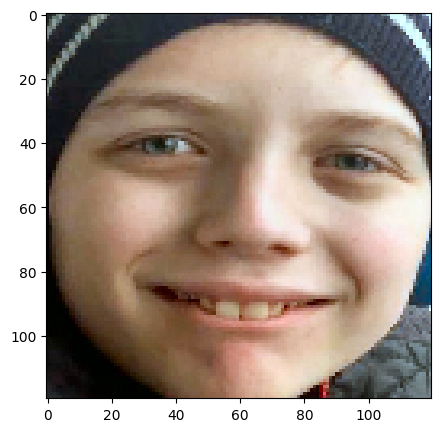

--------------------------------------------------

"Fear" is how the child feels in the photo.

 What we recommend are: 

1: Follow a calming routine that includes things the child likes to see, a song he likes to hear, or trying a weighted blanket (which is a way to relieve stress). The safety of the child and the people around him should be taken care of.  

2: It is important for the mother to maintain her calmness and the calm, caring features of her face - and all members of the family - as what happens is outside the child's control. Rather, it is one of the difficulties that should help the child to deal with and overcome it.  

3: Avoid quarreling in front of the child, because his feeling of safety and psychological calm inside the house is one of the necessary things that contribute to maintaining the stability of his psychological state and making him a healthy personality in the long run. 

4: Avoid exposing the child directly to the situation that makes him afraid, but ta

In [ ]:
recommendation_based_class("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/fear/13.jpg")

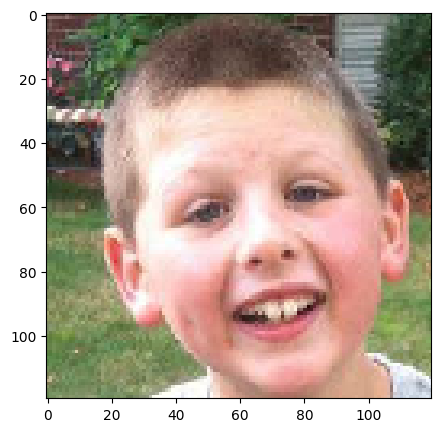

--------------------------------------------------

"Joy" is how the child feels in the photo.

 What we recommend are: 

1: Continue in the same way that made your child joy in order to always make him/her happy 

2: Praise the child's good ideas and encourage him/her to share those ideas with others 

3: Share and enjoy with him/her and join his creative games 

4: Be grateful for the positive energies he is trying to bring into the family 

5: Give the child the freedom to discover his creativity and ideas  



In [ ]:
recommendation_based_class("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/joy/001.jpg")

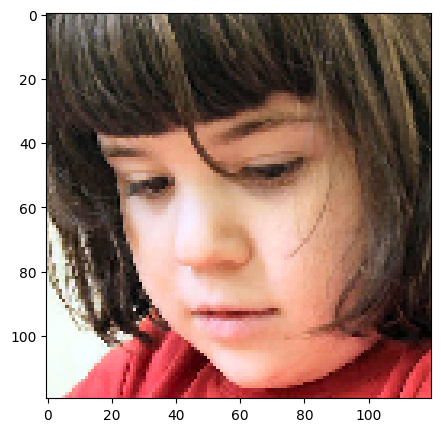

--------------------------------------------------

"Natural" is how the child feels in the photo.

 What we recommend are: 

1: Play with him/her 

2: Watch children movie together  

3: Draw with him/her 

4: Let you child say what she/he feel 

5: Tell him/her a story  



In [ ]:
recommendation_based_class("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/Natural/022.jpg")

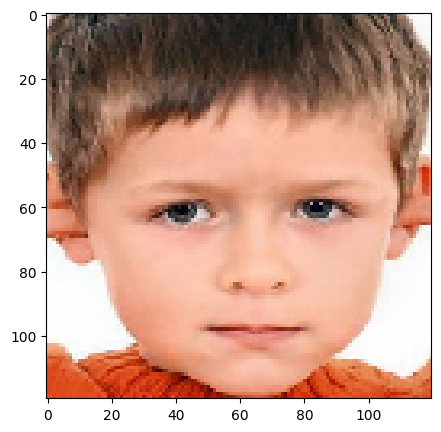

--------------------------------------------------

"Sadness" is how the child feels in the photo.

 What we recommend are: 

1: Allow him/her to explain what they feel and try to understand why him/her sad 

2: Understand what they need 

3: Allow extra time for your child to understand what you have said 

4: Give him/her simple gift 

5: Play with him/her 

6: Draw with him/her  

7: Go with him/her to picnic 

8: Do what your child like to make him/her happy 

9: Watch with him/her their favorite movie 

10: Buy for him/her their favorite snack 

11: Made him/her listen to the Quran with a calm voice 

12: Try to build conversation with him/her about anything positive 



In [ ]:
recommendation_based_class("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/sadness/045.jpg")

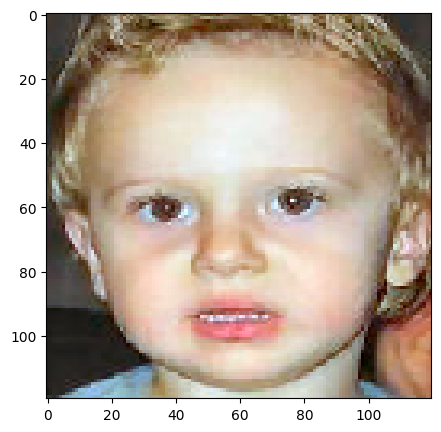

--------------------------------------------------

"Surprise" is how the child feels in the photo.

 What we recommend are: 

1: Make him/her feel safe.  Let him/her know that you are there for him/her - always with him/her in any situation 

2: Provide a quiet place for him/her.  It's impossible for a home to be quiet all the time, so it should have a room that your child can go into when things get a little rough for him/her. 

3: Not punishing the child for actions beyond his control 

4: Allow them to talk about what happened by represent it with drawings and pictures 

5: Focus on saying words of love and reassurance.  It is preferable to distract the child and divert his focus when any trauma occurs in front of him/her 



In [ ]:
recommendation_based_class("/content/autistic-children-emotions-dr-fatma-m-talaat/Autistic Children Emotions - Dr. Fatma M. Talaat/Test/surprise/0388.jpg")